# Ordinary Least Squared (OLS) in Statsmodels

## Introduction

SO far, we created code for running linear regression experiments along with checking their goodness of fit. Python provides us with many libraries to automate this process and also to enhance the efficiency of computation. In this lesson, we shall look at the `statsmodels` library to run OLS regression experiments. 

**You are required to copy and paste provided code in each cell for running these experiments** 

## Objectives

You will be able to:
* Run an OLS regression experiment in the Statsmodels library
* Interpret basic measures to check for the goodness of fit
* Visualize results for regression for deeper inspection

## What is `statsmodels` ?

`statsmodels` is a powerful Python package for many types of statistical analysis. Again, if Python was installed via Anaconda, then the module was installed at the same time. In statistics, ordinary least square (OLS) regression is a method for estimating the unknown parameters in a linear regression model. It minimizes the sum of squared vertical distances between the observed values and the values predicted by the linear approximation. The OLS method in statsmodels is widely used for regression experiments in all fields of study.

![](sm1.png)


For simple Linear Regression statsmodels works as follows:

>Statsmodels gives us simple regression model where y is an n by 1 vector (array), and x is an n by 1 vector. The method returns a vector of size n. Here n is the number of observations. 

## Importing Necessary Libraries
Following cell shows you how to import statsmodels ols method into your working python environment. We shall also import pandas for data handling and matplotlib for visualizations. 
```python
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
```

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Load the data - Initial Checks
Let's load a simple dataset for purpose of understanding the process first. We have the weight-height dataset here that we've seen before. Let's try to identify the relationship between height as independent and weight and dependent variables.  We shall also use pandas visualizations to check for normality and linearity assumptions. 
```python
df = pd.read_csv('heightWeight.csv')
df.plot.kde()
plt.title("Normality check")
plt.show()
plt.scatter(df.height, df.Weight)
plt.title("Linearity check")
```

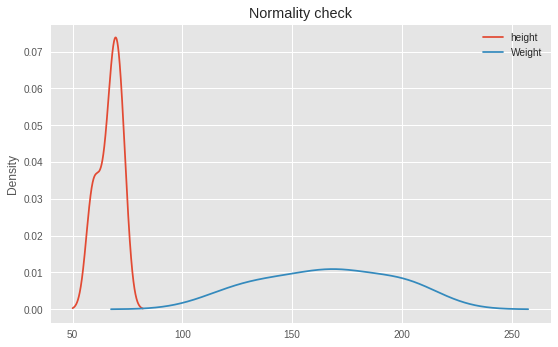

Text(0.5, 1.0, 'Linearity check')

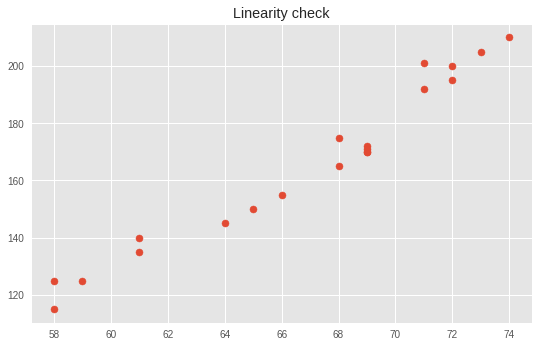

In [6]:
df = pd.read_csv('heightWeight.csv')
df.plot.kde()
plt.title("Normality check")
plt.show()
plt.scatter(df.height, df.Weight)
plt.title("Linearity check")

## Regression formula 

This looks all good according to what we know about normality and linearity. So we can now move and run the regression. statsmodels allows users to fit statistical models using R-style **formulas**. The formula framework is quite powerful and for simple regression it is written using a **~** as Y~X. 

The formula gives instruction for a general structure for a regression call. For statsmodels ols calls you need to have a Pandas dataframe with column names that you will add to your formula. 
```python
f = 'Weight~height'
```

In [7]:
f = 'Weight~height'

We can now pass the formula with variable names to `ols` along with `fit()` to fit a linear model to given variables. 

```python
model = ols(formula=f, data=df).fit()
```

In [8]:
model = ols(formula=f, data=df).fit()

Great, that was fast (remember we have only 20 observations). So now we can go ahead and inspect our fitted model in many ways. First let's get a summary of what the model contains using `model.summary()`

```python
model.summary()
```

Wow , thats a lot of information. statsmodels performs a ton of tests and calculates measures to identify goodness of fit. 

* We can find our R-squared which in this case is 0.95 i.e. very highly related. 
* We can also look at the co-efficients of the model for slope and intercept
* Kurtosis and Skew values are shown on the terms we described earlier
* A lot of significance testing
---
Here is a brief description of these measures:

* Dep. Variable: Singular. Which variable is the point of interest of the model
* Model: Technique used, abbreviated version of Method (see methods for more).
* Method: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. AKA Mean Square Error [MSE].
* No. Observations: The number of observations used by the model. Size of training data.
* Degrees of Freedom Residuals: Degrees of freedom of the residuals. Number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. Internal mechanism to ensures that there are enough observations to parameters.
* Degrees of Freedom Model: Number of parameters in the model (not including the constant/intercept term if present)
* Covariance Type: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit 

* R-squared: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. In English, translates in the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, that which the model and predictors fail to grasp.
* Adj. R-squared: Version of the R-Squared that penalizes additional independent variables. Similar to the concept of flexibility in the Bias-Variance tradeoff where high flexibility reduces bias, but puts the model at risk of high variance; the magnitude of effect a single observation can have on the model outcome. This lowers model robustness and model generalization.
* F-statistic: A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* Prob (F-statistic) or P-Value: The probability that a sample like this would yield the above statistic, and whether the models verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* Log-likelihood: The log of the likelihood function.
* AIC: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* BIC: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

Second Table: Coefficient Reports 

* coef: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* std err: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* t: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* P > |t|: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* [95.0% Conf. Interval]: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

Third Table: Residuals, Autocorrelation, and Multicollinearity 

* Skewness: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* Kurtosis: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakyness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* Omnibus D’Angostino’s test: It provides a combined statistical test for the presence of skewness and kurtosis.
* Prob(Omnibus): The above statistic turned into a probability
* Jarque-Bera: A different test of the skewness and kurtosis
* Prob (JB): The above statistic turned into a probability
* Durbin-Watson: A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis
* Cond. No: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).
---

We shall explain how to interpret some of these measures in upcoming lessons and will look at more in the following sections on stats. 


## Visualize error terms

We can also plot some visualizations to check for regression assumptions in error terms. We shall use `sm.graphics.plot_regress_exog()` for some built in visualization capabilities of statsmodels. here is how we do it. 

```python
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()
```

For the four graphs we see above:

* The “Y and Fitted vs. X” graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated correlated, i.e., when one variable increases the other increases.

* The “Residuals versus height” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The “Partial regression plot” shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. We'll see later how this same graph changes when we add more variables.

* The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on the weight. We shall look at this in more detail in multiple regression.

## QQplots

We can also retrieve our error terms (residuals) from the model and see a qqplot against a standrd normal distribution as shown below:
```python
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
```

So there we have it, we now know how to run a ols simple regression experiment in statsmodels. In the next lesson, we shall look at how to interpret the diagnostics better and relating the outcome to the research question. 

## Summary

In this code-along, we saw how to run a simple regression experiment in statsmodels library. We looked at the format and conventions for running such an experiment. We also looked at regression diagnostics and how to interpret them , plus some visualizations to check for our regression assumptions. 